#Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

In [3]:
os.chdir("/gdrive/MyDrive/Car Price Project")

In [4]:
car_data = pd.read_csv("car data.csv")

In [5]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


#Data Visualising

<ipython-input-8-24ba7b79a20e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_data["Selling_Price"])


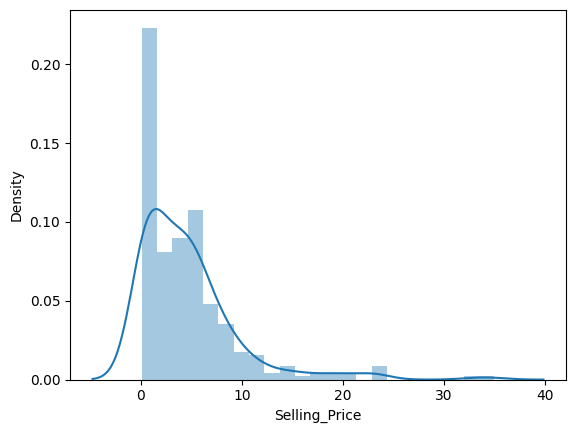

In [8]:
sns.distplot(car_data["Selling_Price"])
plt.show()

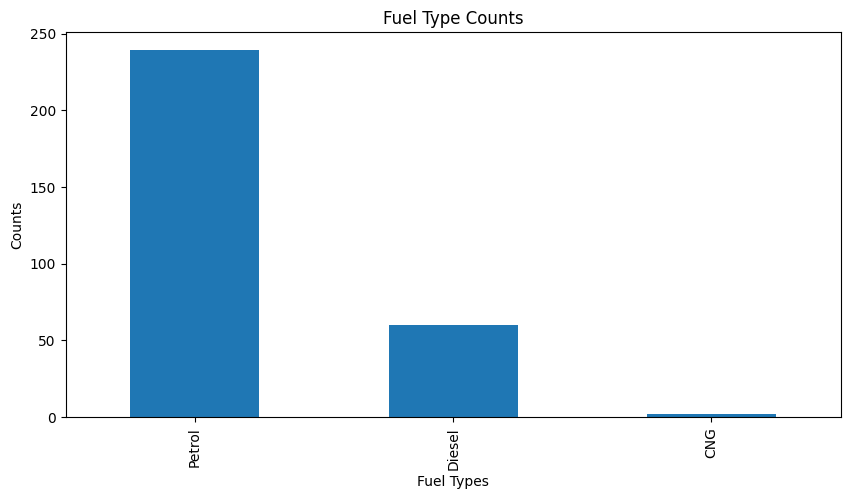

In [9]:
plt.figure(figsize=(10,5))
ax = car_data["Fuel_Type"].value_counts().plot(kind="bar")
ax.set_title("Fuel Type Counts")
plt.ylabel("Counts")
plt.xlabel("Fuel Types")
plt.show()

`Petrol is more than other two fuel types`

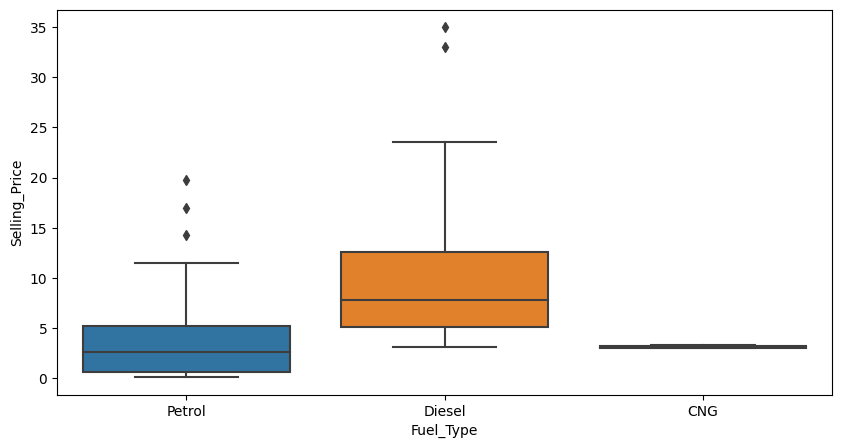

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Fuel_Type", y="Selling_Price", data=car_data)
plt.show()

`Diesel is more expensive`

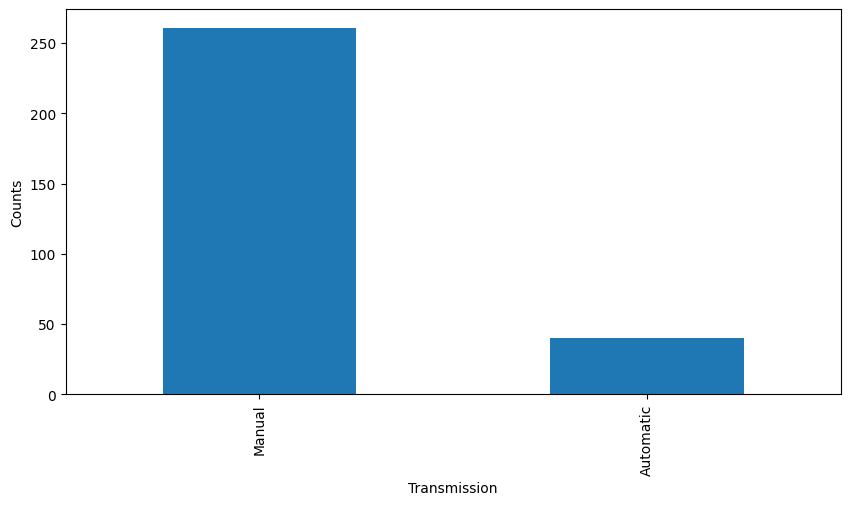

In [11]:
plt.figure(figsize=(10,5))
ax = car_data["Transmission"].value_counts().plot(kind="bar")
plt.xlabel("Transmission")
plt.ylabel("Counts")
plt.show()

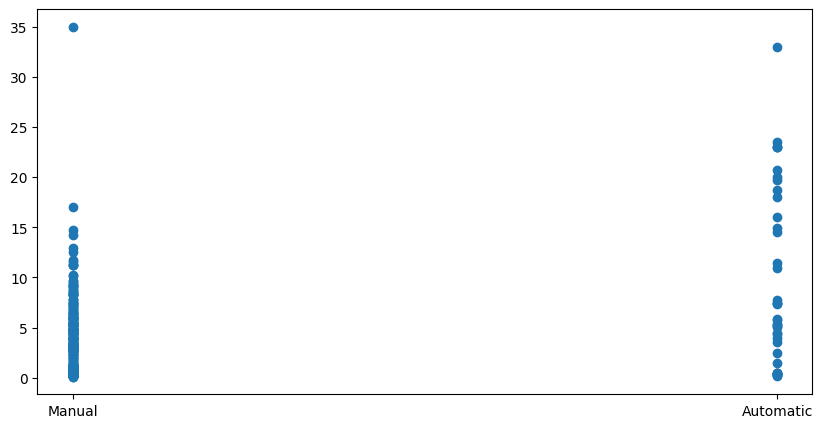

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(car_data["Transmission"], car_data["Selling_Price"])
plt.show()

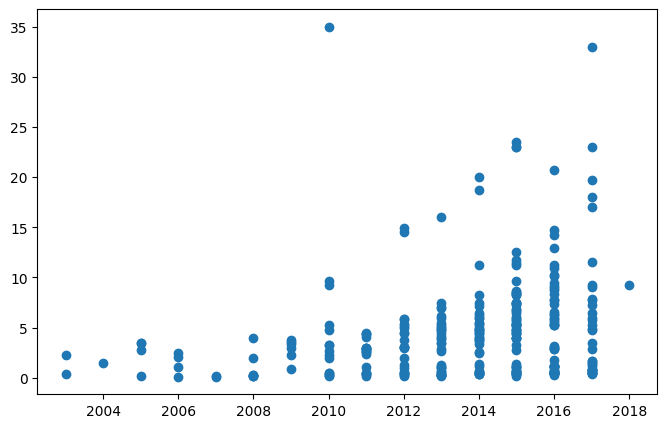

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(car_data["Year"], car_data["Selling_Price"])
plt.show()

#Data Preprocessing

In [14]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
print(car_data["Seller_Type"].unique())
print(car_data["Owner"].unique())
print(car_data["Fuel_Type"].unique())
print(car_data["Transmission"].unique())

['Dealer' 'Individual']
[0 1 3]
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']


In [16]:
cat_cols = car_data.select_dtypes(include=["object"]).columns

In [17]:
data_cat = car_data[cat_cols]

In [18]:
data_cat = data_cat.drop("Car_Name", axis=1)

In [19]:
le = LabelEncoder()

data_cat = data_cat.apply(le.fit_transform)

In [20]:
data_cat.head()

,Fuel_Type,Seller_Type,Transmission
0,2,0,1
1,1,0,1
2,2,0,1
3,2,0,1
4,1,0,1


In [21]:
car_data = car_data.drop(data_cat, axis=1)

In [22]:
car_data = pd.concat([car_data, data_cat], axis=1)

In [23]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type,Seller_Type,Transmission
0,ritz,2014,3.35,5.59,27000,0,2,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,1
2,ciaz,2017,7.25,9.85,6900,0,2,0,1
3,wagon r,2011,2.85,4.15,5200,0,2,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,1


In [24]:
car_data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type,Seller_Type,Transmission
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,-0.053643,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,-0.509467,-0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,-0.440415,-0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,-0.166801,-0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,0.055705,0.124269,-0.050316
Fuel_Type,-0.053643,-0.509467,-0.440415,-0.166801,0.055705,1.000000,0.352415,0.080466
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,0.124269,0.352415,1.000000,0.063240
Transmission,0.000394,-0.367128,-0.348715,-0.162510,-0.050316,0.080466,0.063240,1.000000


##Train Test Split

In [25]:
y = car_data["Selling_Price"]
x =  car_data.drop(['Selling_Price', 'Car_Name'], axis=1)

In [35]:
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.33, random_state = 0)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.5, random_state = 0)

##Data Scaling

In [36]:
sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_cv_scaled = sc.transform(x_cv)

#Modeling

##Linear regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

In [29]:
y_hat = lr.predict(x_train_scaled)

In [30]:
print(mean_squared_error(y_train,y_hat)/2)
print(r2_score(y_train,y_hat))

1.391416398797022
0.885943763165151


In [37]:
y_hat_cv = lr.predict(x_cv_scaled)

In [39]:
print(mean_squared_error(y_cv,y_hat_cv)/2)
print(r2_score(y_cv,y_hat_cv))

1.01997955484108
0.811136344468475


##Polynomial Features

In [63]:
poly_reg = PolynomialFeatures(degree = 3)
x_train_scaled_mapped = poly_reg.fit_transform(x_train_scaled)

x_cv_scaled_mapped = poly_reg.transform(x_cv_scaled)

In [ ]:
lr_poly = LinearRegression()
lr_poly.fit(x_train_scaled_mapped, y_train)

In [65]:
y_hat_poly = lr_poly.predict(x_train_scaled_mapped)

In [66]:
print(mean_squared_error(y_train,y_hat_poly)/2)
print(r2_score(y_train,y_hat_poly))

0.11366121083050225
0.99068304068241


In [67]:
y_hat_poly_cv = lr_poly.predict(x_cv_scaled_mapped)

In [68]:
print(mean_squared_error(y_cv,y_hat_poly_cv)/2)
print(r2_score(y_cv,y_hat_poly_cv))

0.4357544308887124
0.9193138976746215
